## LITHOFACIES PREDICTION WITH KNN ML ALGORITHM

### METHODOLOGY

#### DATA LOADING OF PREPROCESSED DATA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = "old_clean_data.xlsx"
data = pd.read_excel(file_path)
data

,DEPTH,SONIC,CAL,NPHI,RHOB,GR,LLD9
0,3434.0,73.80000,12.498179,0.386452,2.160385,29.616300,0.091800
1,3434.5,74.60000,12.498179,0.386452,2.160385,29.907000,0.091600
2,3435.0,74.40000,12.498179,0.386452,2.160385,31.941900,0.091700
3,3435.5,74.40000,12.498179,0.386452,2.160385,31.171500,0.091600
4,3436.0,74.90000,12.498179,0.386452,2.160385,32.654100,0.092100
...,...,...,...,...,...,...,...
12981,9924.5,111.83729,11.718800,0.214726,2.292050,56.547875,27.035806
12982,9925.0,111.83729,11.718800,0.214726,2.292050,56.547875,27.035806
12983,9925.5,111.83729,11.718800,0.214726,2.292050,56.547875,27.035806
12984,9926.0,111.83729,11.718800,0.214726,2.292050,56.547875,27.035806


In [2]:
data = data[['DEPTH','CAL', 'SONIC','RHOB','LLD9','GR']]
data

,DEPTH,CAL,SONIC,RHOB,LLD9,GR
0,3434.0,12.498179,73.80000,2.160385,0.091800,29.616300
1,3434.5,12.498179,74.60000,2.160385,0.091600,29.907000
2,3435.0,12.498179,74.40000,2.160385,0.091700,31.941900
3,3435.5,12.498179,74.40000,2.160385,0.091600,31.171500
4,3436.0,12.498179,74.90000,2.160385,0.092100,32.654100
...,...,...,...,...,...,...
12981,9924.5,11.718800,111.83729,2.292050,27.035806,56.547875
12982,9925.0,11.718800,111.83729,2.292050,27.035806,56.547875
12983,9925.5,11.718800,111.83729,2.292050,27.035806,56.547875
12984,9926.0,11.718800,111.83729,2.292050,27.035806,56.547875


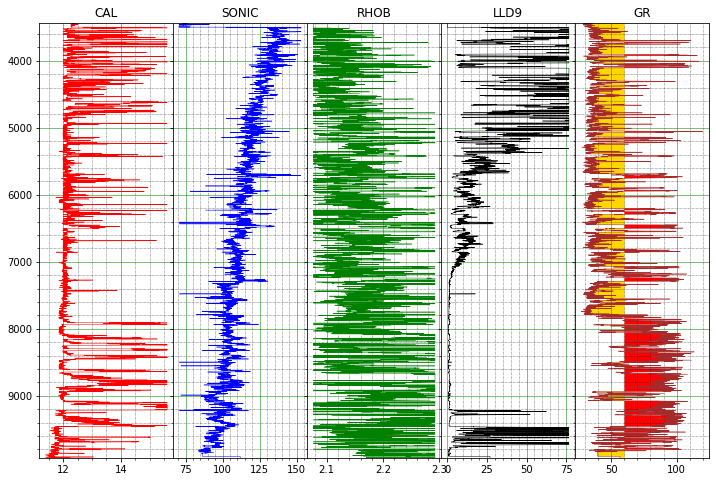

In [3]:

log_data = data.values
rows, cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,8), sharey=True)
mnemonics = ['CAL','SONIC', 'RHOB','LLD9','GR']
color = ['red','blue','green','black','brown']
for i in range(cols):
    ax[i].plot(log_data[:,i+1], log_data[:,0],linewidth='0.5',color=color[i])
    ax[i].set_ylim(max(log_data[:, 0]), min(log_data[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %mnemonics[i])

y2=log_data[:,5] #extract data from the particular column to color
y1=y2*0+60 #shale line
ax[4].fill_betweenx(log_data[:,0], y1,y2, where=(y1>=y2), color='gold',linewidth=0)
ax[4].fill_betweenx(log_data[:,0], y1,y2, where=(y1<y2), color='red',linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()


In [4]:
depth=data.DEPTH.values
depth

array([3434. , 3434.5, 3435. , ..., 9925.5, 9926. , 9926.5])

#### LITHOFACIES CLASSIFICATION

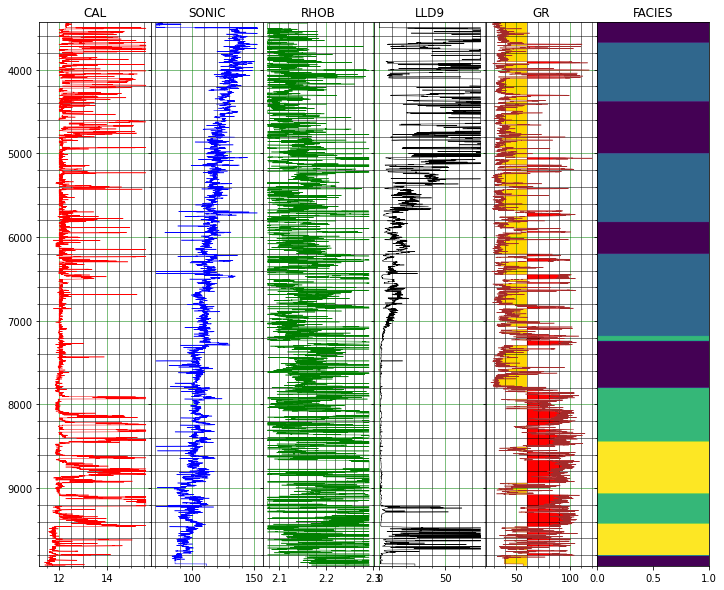

In [5]:
import pandas as pd
#pd.options.mode.chained_assignment = None  # default='warn'

tb=[0,3680,4380,5000,5820,6200,7180,7240,7800,8440,9060,9420,9800,10000]
f=[1,2,1,2,1,2,3,1,3,4,3,4,1]

facies=[]
for i in range(len(depth)):
    for j in range(len(tb)-1):
        if depth[i]>tb[j] and depth[i] <= tb[j+1]:
            facies.append(f[j])            

data = data.copy() # COPY THE ORIGINAL DATAFRAME
data['FACIES'] = facies #APPEND THE A NEW FACIES COLUMN
#data.loc[:, 'FACIES'] = facies
data.to_csv('KNN_well_logs_facies.csv',index=False)
facies_log_data = data.values
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
labels = ['CAL','SONIC', 'RHOB','LLD9','GR','FACIES']
color = ['red','blue','green','black','brown']
for i in range(cols):
    if i<cols-1:
        ax[i].plot(facies_log_data[:,i+1], facies_log_data[:,0],linewidth='0.5', color= color[i])
        ax[i].set_ylim(max(facies_log_data[:,0]), min(facies_log_data[:,0]))
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5',color='green')
        ax[i].grid(which='minor', linestyle='-', linewidth='0.5',color='black')
        ax[i].set_title(labels[i])
    elif i==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto',extent=[0,1,max(facies_log_data[:, 0]), min(facies_log_data[:, 0])])
        ax[i].set_title(labels[i])

y2=facies_log_data[:,5] #particular column to color
y1=y2*0+60 #shale line
ax[4].fill_betweenx(facies_log_data[:,0], y1,y2, where=(y1>=y2), color='gold',linewidth=0) 
ax[4].fill_betweenx(facies_log_data[:,0], y1,y2, where=(y1<y2), color='red',linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()

#### FACIES PREDICTION WITH KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn
import time

#### DATA SPLITTING INTO FEATURES AND TARGET

In [7]:
# COPY THE ORIGINAL NUMPY ARRAY DATA AND CONVERT BACK TO A DATA FRAME
pred_log_data = data.copy()
pred_log_data

,DEPTH,CAL,SONIC,RHOB,LLD9,GR,FACIES
0,3434.0,12.498179,73.80000,2.160385,0.091800,29.616300,1
1,3434.5,12.498179,74.60000,2.160385,0.091600,29.907000,1
2,3435.0,12.498179,74.40000,2.160385,0.091700,31.941900,1
3,3435.5,12.498179,74.40000,2.160385,0.091600,31.171500,1
4,3436.0,12.498179,74.90000,2.160385,0.092100,32.654100,1
...,...,...,...,...,...,...,...
12981,9924.5,11.718800,111.83729,2.292050,27.035806,56.547875,1
12982,9925.0,11.718800,111.83729,2.292050,27.035806,56.547875,1
12983,9925.5,11.718800,111.83729,2.292050,27.035806,56.547875,1
12984,9926.0,11.718800,111.83729,2.292050,27.035806,56.547875,1


In [8]:

#facies_log_data = pd.DataFrame(facies_log_data, columns = labels)
# SPLIT INTO FEATURES AND TARGET
Xtrain = pred_log_data.iloc[:,1:6].values # ALL ROWS IN COLUMN 1 TO 4
Ytrain = pred_log_data.iloc[:,-1] # ALL ROWS IN THE LAST COLUMN (FACIES)


##### DATA NORMALIZATION

In [9]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)

##### MODEL TRAINING

In [10]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,Ytrain)#global equation for testing new dataset
Xtest = Xtrain

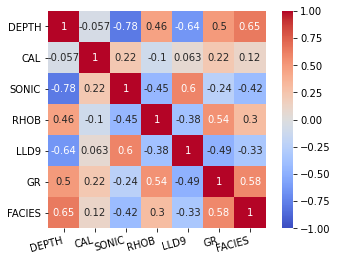

In [11]:
#### confusion matrix
import seaborn as sns
cor_train = pred_log_data.corr()
cor_test = pred_log_data.corr()
ax = sns.heatmap(
    cor_train,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=15,
    horizontalalignment='right')
plt.show()

#### VERIFYING MODEL 

In [12]:
ypred = model.predict(Xtest)

### LOG PLOT PREDICTED FACIES

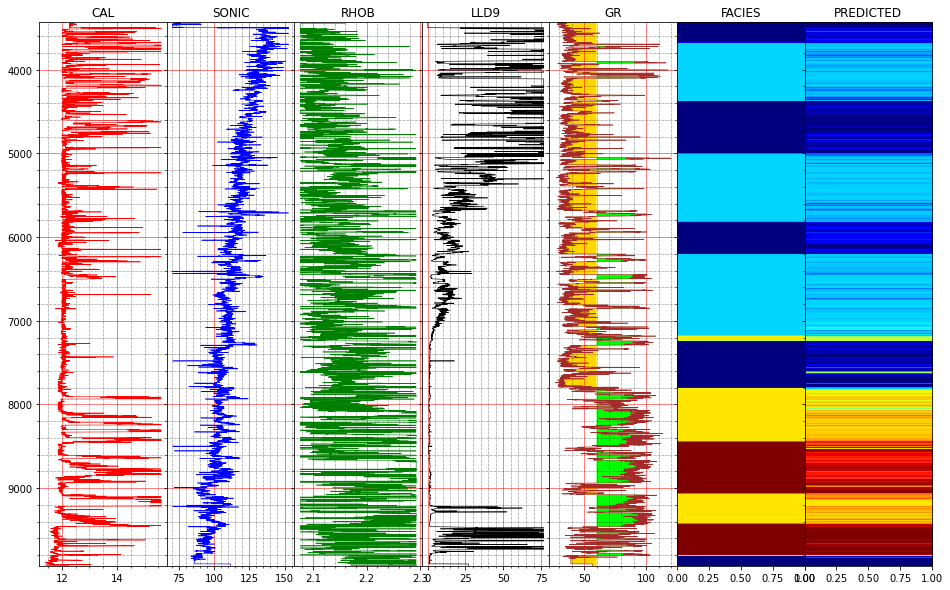

In [13]:
#ypred = model.predict(Xtest)
#mnemonics = list(data.columns)
well_log_data = pred_log_data.values
rows, cols = 1, 7
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(16,10), sharey=True)
labels = ['DEPTH','CAL','SONIC', 'RHOB','LLD9','GR','FACIES']
color = ['red','blue','green','black','brown']
for i in range(cols):
    if i < cols-2:
        ax[i].plot(well_log_data[:,i+1],well_log_data[:,0], linewidth=0.6, color = color[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(well_log_data[:, 0]), min(well_log_data[:, 0]), 0)
        ax[i].set_title('%s' %labels[i+1])
    elif i==cols-2:
        F = np.vstack((well_log_data[:,-1],well_log_data[:,-1])).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(well_log_data[:,0]), min(well_log_data[:,0])])
        ax[i].set_title('%s' % labels[i + 1])
    elif i==cols-1:
        F = np.vstack((ypred,ypred)).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(well_log_data[:,0]), min(well_log_data[:,0])])
        ax[i].set_title('PREDICTED')
cl = 60
y2 = well_log_data[:,5]
y1 = y2*0+cl
ax[4].fill_betweenx(well_log_data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[4].fill_betweenx(well_log_data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()

#### DATA FILTERING AND MODEL RETRAINING

In [14]:
filtered_data = pred_log_data.copy()
filtered_data['VELP']=1000000/filtered_data.SONIC
filtered_data

,DEPTH,CAL,SONIC,RHOB,LLD9,GR,FACIES,VELP
0,3434.0,12.498179,73.80000,2.160385,0.091800,29.616300,1,13550.135501
1,3434.5,12.498179,74.60000,2.160385,0.091600,29.907000,1,13404.825737
2,3435.0,12.498179,74.40000,2.160385,0.091700,31.941900,1,13440.860215
3,3435.5,12.498179,74.40000,2.160385,0.091600,31.171500,1,13440.860215
4,3436.0,12.498179,74.90000,2.160385,0.092100,32.654100,1,13351.134846
...,...,...,...,...,...,...,...,...
12981,9924.5,11.718800,111.83729,2.292050,27.035806,56.547875,1,8941.561413
12982,9925.0,11.718800,111.83729,2.292050,27.035806,56.547875,1,8941.561413
12983,9925.5,11.718800,111.83729,2.292050,27.035806,56.547875,1,8941.561413
12984,9926.0,11.718800,111.83729,2.292050,27.035806,56.547875,1,8941.561413


In [15]:
filtered_data = pd.DataFrame(filtered_data)
filtered_data = filtered_data[['DEPTH','CAL','VELP','RHOB','LLD9','GR','FACIES']]
filtered_data

,DEPTH,CAL,VELP,RHOB,LLD9,GR,FACIES
0,3434.0,12.498179,13550.135501,2.160385,0.091800,29.616300,1
1,3434.5,12.498179,13404.825737,2.160385,0.091600,29.907000,1
2,3435.0,12.498179,13440.860215,2.160385,0.091700,31.941900,1
3,3435.5,12.498179,13440.860215,2.160385,0.091600,31.171500,1
4,3436.0,12.498179,13351.134846,2.160385,0.092100,32.654100,1
...,...,...,...,...,...,...,...
12981,9924.5,11.718800,8941.561413,2.292050,27.035806,56.547875,1
12982,9925.0,11.718800,8941.561413,2.292050,27.035806,56.547875,1
12983,9925.5,11.718800,8941.561413,2.292050,27.035806,56.547875,1
12984,9926.0,11.718800,8941.561413,2.292050,27.035806,56.547875,1


### FILTERING WITH BUTTERWORTH FILTER

In [16]:
from butterworth import  butter_lowpass_filter

filtered_data['RHOBF'] = butter_lowpass_filter(filtered_data.RHOB.values,10,1000/1, order=5)
filtered_data['SONICF'] = butter_lowpass_filter(filtered_data.VELP.values,10,1000/1, order=5)
filtered_data['GRF'] = butter_lowpass_filter(filtered_data.GR.values,10,1000/1, order=5)
filtered_data['LLD9F'] = butter_lowpass_filter(filtered_data.LLD9.values,10,1000/1, order=5)
selected_columns = ['DEPTH', 'CAL', 'SONICF', 'RHOBF', 'LLD9F', 'GRF', 'FACIES']
filtered_data = filtered_data[selected_columns]
filtered_data

,DEPTH,CAL,SONICF,RHOBF,LLD9F,GRF,FACIES
0,3434.0,12.498179,13513.422084,2.155197,-0.288988,29.218072,1
1,3434.5,12.498179,13492.830504,2.154169,-0.262656,29.326219,1
2,3435.0,12.498179,13471.903450,2.153096,-0.233861,29.433946,1
3,3435.5,12.498179,13450.692088,2.151979,-0.202625,29.541122,1
4,3436.0,12.498179,13429.250197,2.150820,-0.168977,29.647616,1
...,...,...,...,...,...,...,...
12981,9924.5,11.718800,9714.362868,2.261366,19.229861,51.550063,1
12982,9925.0,11.718800,9713.303004,2.261395,19.240215,51.556751,1
12983,9925.5,11.718800,9712.434905,2.261420,19.248699,51.562229,1
12984,9926.0,11.718800,9711.732369,2.261440,19.255567,51.566663,1


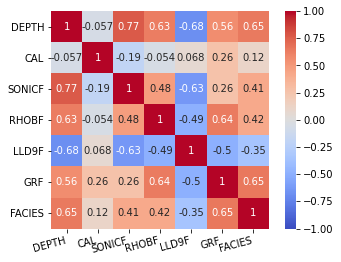

In [17]:
cor_train = filtered_data.corr()
cor_test = filtered_data.corr()
ax = sns.heatmap(
    cor_train,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=15,
    horizontalalignment='right')
plt.show()

#### MODEL RETRAINING

In [18]:
filtered_Xtrain = filtered_data.iloc[:,1:6].values # ALL ROWS IN COLUMN 1 TO 4
filtered_Ytrain = filtered_data.iloc[:,-1] # ALL ROWS IN THE LAST COLUMN (FACIES)

In [19]:
sc = StandardScaler()
filtered_Xtrain = sc.fit_transform(filtered_Xtrain)

In [20]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(filtered_Xtrain,filtered_Ytrain)#global equation for testing new dataset
filtered_Xtest = filtered_Xtrain

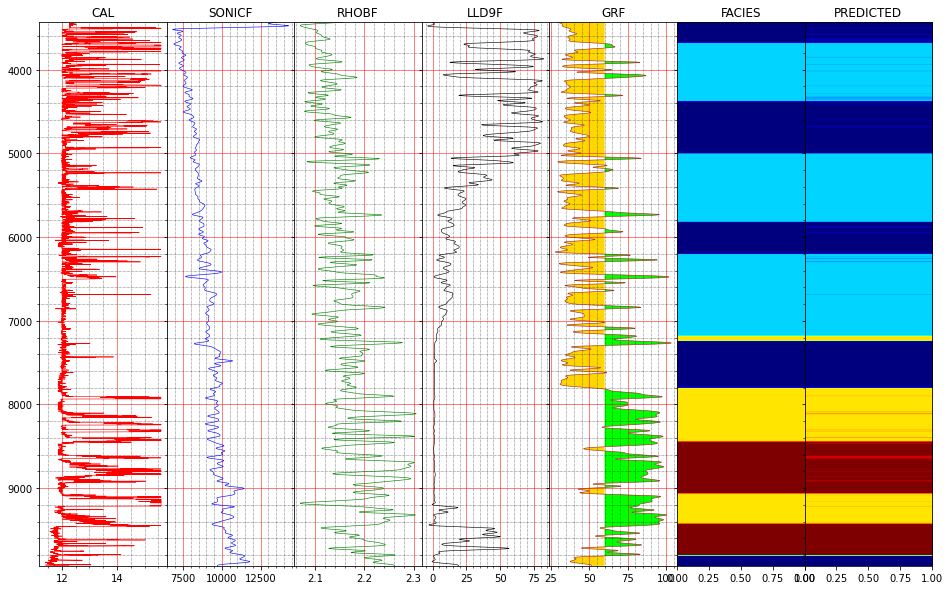

In [21]:
filtered_ypred = model.predict(filtered_Xtest)
#mnemonics = list(data.columns)
filtered_well_log_data = filtered_data.values
rows, cols = 1, 7
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(16,10), sharey=True)
labels = ['DEPTH','CAL','SONICF', 'RHOBF','LLD9F','GRF','FACIES']
color = ['red','blue','green','black','brown']
for i in range(cols):
    if i < cols-2:
        ax[i].plot(filtered_well_log_data[:,i+1],filtered_well_log_data[:,0], linewidth=0.6, color = color[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(filtered_well_log_data[:, 0]), min(filtered_well_log_data[:, 0]), 0)
        ax[i].set_title('%s' %labels[i+1])
    elif i==cols-2:
        F = np.vstack((filtered_well_log_data[:,-1],filtered_well_log_data[:,-1])).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(filtered_well_log_data[:,0]), min(filtered_well_log_data[:,0])])
        ax[i].set_title('%s' % labels[i + 1])
    elif i==cols-1:
        F = np.vstack((filtered_ypred,filtered_ypred)).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(filtered_well_log_data[:,0]), min(filtered_well_log_data[:,0])])
        ax[i].set_title('PREDICTED')
cl = 60
y2 = filtered_well_log_data[:,5]
y1 = y2*0+cl
ax[4].fill_betweenx(filtered_well_log_data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[4].fill_betweenx(filtered_well_log_data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()

### MODEL EVALUATION

In [22]:
X = filtered_data['FACIES'].values
Y = filtered_ypred
rmse = np.sqrt(mean_squared_error(X,Y))
medae = median_absolute_error(X,Y)
r2 = r2_score(X,Y)
print(rmse)
print(medae)
print(r2)

0.10566868475538607
0.0
0.9893341334465606


In [23]:
result = pd.DataFrame({'Actual Facies': X, 'Predicted Facies': Y})
result

,Actual Facies,Predicted Facies
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
12981,1,1
12982,1,1
12983,1,1
12984,1,1


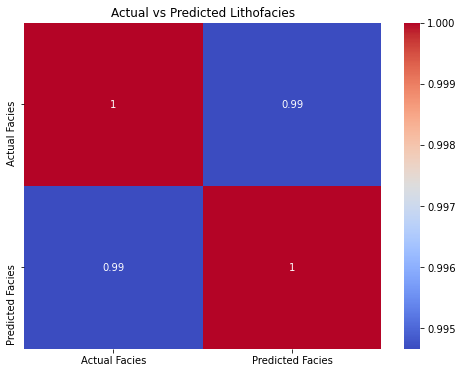

In [24]:
plot_size = 6
plt.figure(figsize=(8,6))
plt.title('Actual vs Predicted Lithofacies')
sns.heatmap(result.corr(), annot=True, cmap='coolwarm')
plt.show()

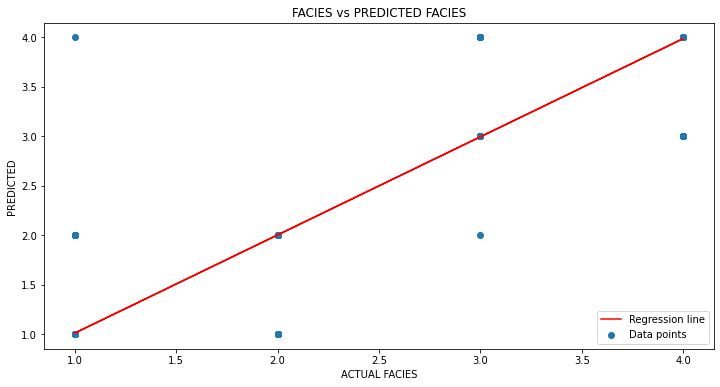

In [25]:
plt.figure(figsize=(12,6))
coefficients = np.polyfit(X,Y,1)
poly = np.poly1d(coefficients)
regression_line = poly(Y)
plt.scatter(X,Y, label='Data points')
plt.plot(Y,regression_line,color='red', label='Regression line')
plt.title("FACIES vs PREDICTED FACIES")
plt.xlabel("ACTUAL FACIES")
plt.ylabel("PREDICTED")
plt.legend()
#plt.show()